I will only present how to obtain a mapper graph for the spam and ham classes in the Spambase dataset.

In [20]:
import pandas as pd
import kmapper as km
from sklearn import cluster
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

In [3]:
#read the SpamBase E-mail data
col_names=list(['make','address','all','3d','our','over','remove','internet','order','mail','receive','will','people','report','addresses','free','business','email','you','credit','your','font','000','money','hp','hpl','george','650','lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct','cs','meeting','original','project','re','edu','table','conference',';','(','[','!','$','#','capital_run_length_average', 'capital_run_length_longes', 'capital_run_length_total','Spam'])
data=pd.read_csv('/Users/emintatar/data_science/Adem_Research/spambase/spambase.txt',index_col=False,names=col_names) 
labels=data['Spam']
data_nolabel=data.drop('Spam',axis=1)
number_of_emails=data.shape[0]
spam_emails=data[data['Spam']==1].drop('Spam',axis=1)
ham_emails=data[data['Spam']==0].drop('Spam',axis=1)
number_of_spam_emails=spam_emails.shape[0]
number_of_ham_emails=ham_emails.shape[0]

In [4]:
mapper = km.KeplerMapper(verbose=1)
tsne=TSNE(random_state=1564,n_iter=2000)

KeplerMapper()


..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=2000, n_iter_without_progress=300,
   perplexity=30.0, random_state=1564, verbose=1)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1813, 57)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=2000, n_iter_without_progress=300,
   perplexity=30.0, random_state=1564, verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1813 samples in 0.004s...
[t-SNE] Computed neighbors for 1813 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1813
[t-SNE] Computed conditional probabilities for sample 1813 / 1813
[t-SNE] Mean

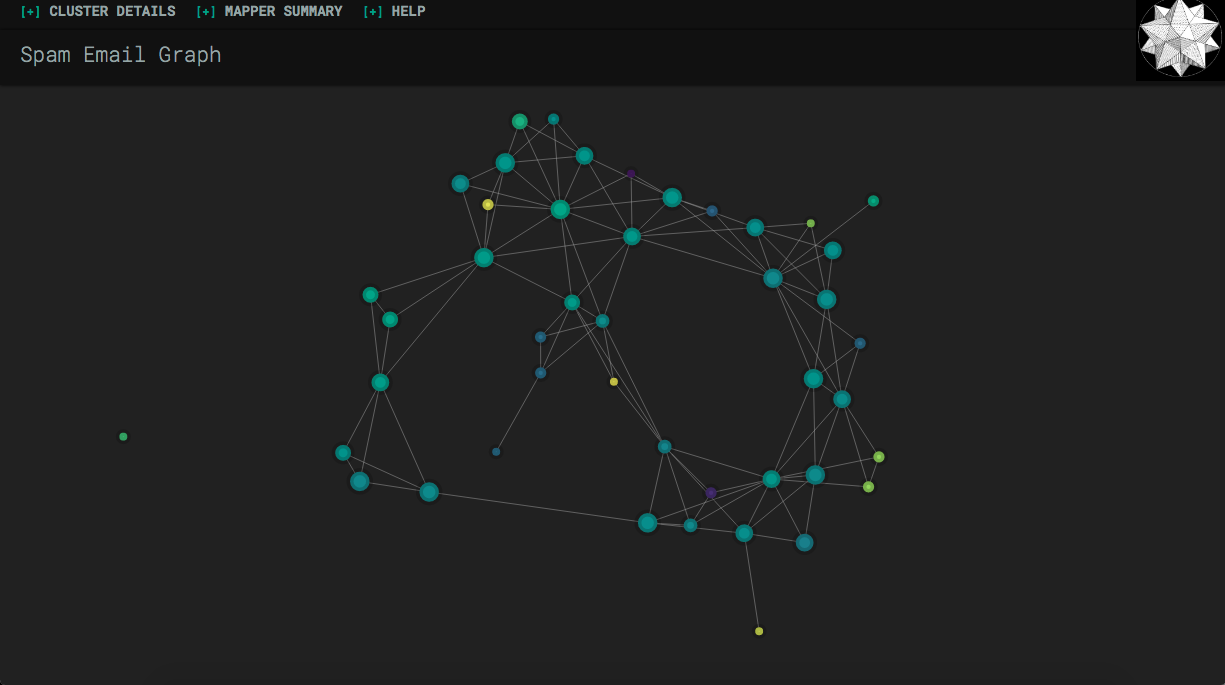

In [21]:
#graph of spam emails
projected_spam = mapper.fit_transform(spam_emails, projection=tsne,scaler=MinMaxScaler())
graph_spam = mapper.map(projected_spam, spam_emails, nr_cubes=5,overlap_perc=0.3,clusterer=cluster.AgglomerativeClustering(n_clusters=2,linkage="single",affinity="cosine"))
mapper.visualize(graph_spam, nbins=10, path_html='/Users/emintatar/data_science/Adem_Research/spambase/spamemails.html',title="Spam Email Graph")
url = '/Users/emintatar/data_science/Adem_Research/spambase/spamemails.png'
Image(url)

..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=2000, n_iter_without_progress=300,
   perplexity=30.0, random_state=1564, verbose=1)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (2788, 57)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=2000, n_iter_without_progress=300,
   perplexity=30.0, random_state=1564, verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2788 samples in 0.018s...
[t-SNE] Computed neighbors for 2788 samples in 0.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2788
[t-SNE] Computed conditional probabilities for sample 2000 / 2788
[t-SNE] Comp

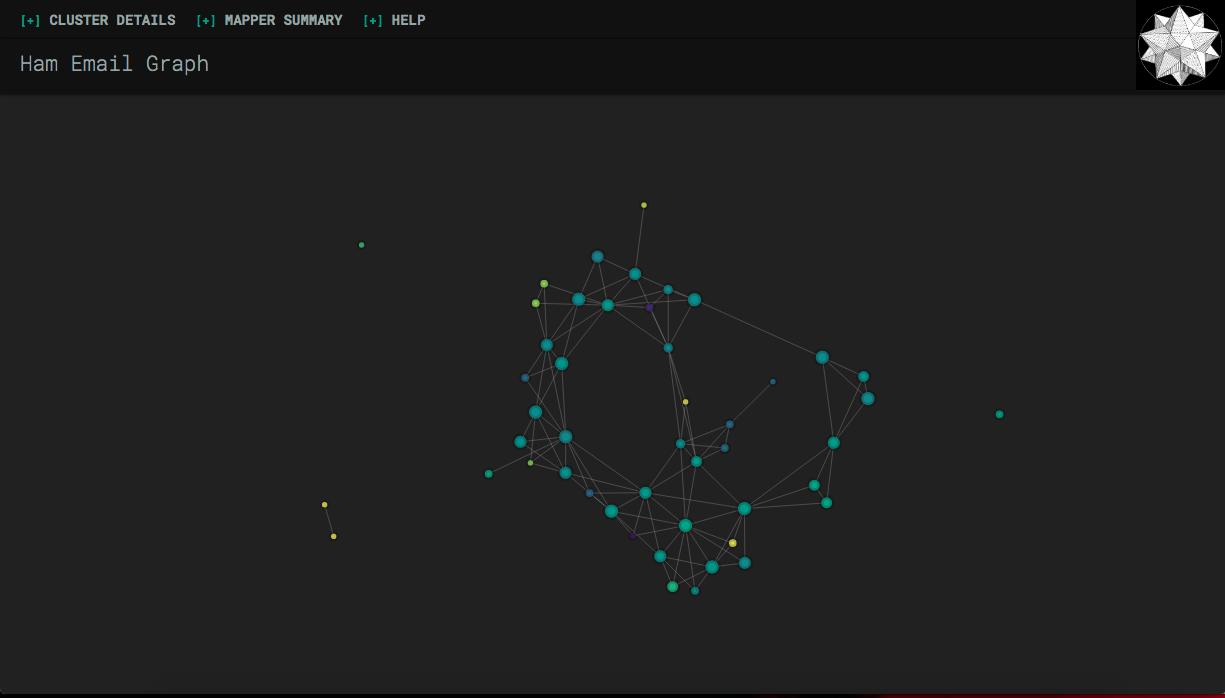

In [22]:
#graph of ham emails
projected_ham = mapper.fit_transform(ham_emails, projection=tsne,scaler=MinMaxScaler())
graph_ham = mapper.map(projected_ham, ham_emails, nr_cubes=5,overlap_perc=0.3,clusterer=cluster.AgglomerativeClustering(n_clusters=2,linkage="single",affinity="cosine"))
mapper.visualize(graph_spam, nbins=10, path_html='/Users/emintatar/data_science/Adem_Research/spambase/hamemails.html',title="Ham Email Graph")
url = '/Users/emintatar/data_science/Adem_Research/spambase/hamemails.png'
Image(url)